In [1]:
import xarray as xr
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [2]:
import sys

### Here we calculate integrated timeseries for the Rhine region 

In [10]:
var='pet'
freq='Amon'
timeslice='PD'
i='01'
j='0'
diri='/perm/nklm/Px_drought/testing/LENTIS/'

ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None)

In [8]:
ds

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 512, lat: 256)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lon        (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/52)
    CDI:                                Climate Data Interface version 2.1.1 ...
    source:                             EC-Earth3 (2019): \naerosol: none\nat...
    institution:                        The Royal Netherlands Meteorological ...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    ...                                 ...
    variable_id:                        pr
    variant_info:                       The p5 label refers to the fact that ...
    variant_label:                      r1i1p5f1
    license:                            The VAREX model data produced by KNMI...
    cmor_version:                       3.5.0
    CDO:                                Climate Data Operators version 2.1.1 ...

In [9]:
TSpr, box_seasons = calc_boxstat(ds, 'pr', area='rhine')

In [11]:
TSpet, box_seasons = calc_boxstat(ds, 'pet_pm_asce', area='rhine')

In [46]:
ds.pet_pm_asce

<xarray.DataArray 'pet_pm_asce' (time: 120, lat: 256, lon: 512)>
[15728640 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Attributes:
    standard_name:     pet_ASCE_PM
    long_name:         Potential evapotranspiration with ASCE Penman-Monteith
    units:             mm day-1
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  128
    cell_methods:      time: mean
    comment:           The surface potential evapotranspiration with the ASCE...

In [29]:
TSpr.shape

(120,)

In [12]:
import rhine_myd_func as func

In [13]:
# import os
# os.environ['R_HOME']  = '/usr/local/apps/R/4.2.2/lib64/R/' # change as needed
# os.environ["PATH"] = r"/usr/local/apps/node/18.13.0/bin:/usr/local/apps/python3/3.10.10-01/bin:/etc/ecmwf/ssd/ssd1/tmpdirs/nklm.31061218/bin:/perm/nklm/mambaforge/bin:/perm/nklm/mambaforge/condabin:/usr/local/apps/ncview/2.1.7/bin:/usr/local/apps/cdo/2.1.1/bin:/usr/local/apps/git/2.39.1/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/perm/ms/nl/nklm/Downloads/julia-1.0.5/bin:/home/nklm/.local/bin:/home/nklm/bin" + ":" + os.environ["R_HOME"] 


import rpy2

In [14]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
# import functions (and packages) from R
r_time_series = robjects.r('ts')


In [18]:
import rpy2.rinterface
#rpy2.rinterface.set_initoptions((b'rpy2', b'--no-save', b'--no-restore', b'--quiet'))
from rpy2.robjects.packages import importr
base = importr('base')
print(base._libPaths())

[1] "/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library"



In [ ]:
# install the SPEI package from R

In [20]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x15276fbdbb00> [RTYPES.NILSXP]

In [21]:
# # R package names
# packnames = ('SPEI')

# # R vector of strings
# from rpy2.robjects.vectors import StrVector

# # Selectively install what needs to be install.
# # We are fancy, just because we can.
# names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
# if len(names_to_install) > 0:
#     utils.install_packages(StrVector(names_to_install))

In [23]:
# 
# utils.chooseCRANmirror(ind=2) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x15276fbdbb00> [RTYPES.NILSXP]

In [26]:
utils.install_packages('SPEI', repos="https://cran.stat.unipd.it/")

R[write to console]: also installing the dependencies ‘colorspace’, ‘utf8’, ‘RcppArmadillo’, ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘fansi’, ‘magrittr’, ‘pillar’, ‘pkgconfig’, ‘cpp11’, ‘goftest’, ‘Lmoments’, ‘MASS’, ‘Rcpp’, ‘hypergeo’, ‘plyr’, ‘cli’, ‘glue’, ‘gtable’, ‘isoband’, ‘lifecycle’, ‘mgcv’, ‘rlang’, ‘scales’, ‘tibble’, ‘vctrs’, ‘withr’, ‘backports’, ‘lattice’, ‘generics’, ‘timechange’, ‘lmomco’, ‘lmom’, ‘TLMoments’, ‘reshape’, ‘ggplot2’, ‘checkmate’, ‘zoo’, ‘lubridate’


R[write to console]: trying URL 'https://cran.stat.unipd.it/src/contrib/colorspace_2.1-0.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 2116339 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c colorspace.c -o colorspace.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/incl

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-colorspace/00new/colorspace/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (colorspace)
* installing *source* package ‘utf8’ ...
** package ‘utf8’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -Iutf8lite/src -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c as_utf8.c -o as_utf8.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -Iutf8lite/src -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /per

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-utf8/00new/utf8/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (utf8)
* installing *source* package ‘contfrac’ ...
** package ‘contfrac’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-contfrac/00new/contfrac/libs
** R
** byte-compile and prepare package for lazy loading


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c contfrac.c -o contfrac.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include 

** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (contfrac)
* installing *source* package ‘deSolve’ ...
** package ‘deSolve’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c DLLutil.c -o DLLutil.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -f

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-deSolve/00new/deSolve/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading


Creating a new generic function for ‘matplot’ in package ‘deSolve’


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (deSolve)
* installing *source* package ‘farver’ ...
** package ‘farver’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c ColorSpace.cpp -o ColorSpace.o
x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=hasw

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-farver/00new/farver/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (farver)
* installing *source* package ‘labeling’ ...
** package ‘labeling’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary in

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c assumptions.c -o assumptions.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-fansi/00new/fansi/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fansi)
* installing *source* package ‘magrittr’ ...
** package ‘magrittr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c pipe.c -o pipe.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-magrittr/00new/magrittr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (magrittr)
* installing *source* package ‘pkgconfig’ ...
** package ‘pkgconfig’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if 

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c ADinf.c -o ADinf.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebu

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-goftest/00new/goftest/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (goftest)
* installing *source* package ‘MASS’ ...
** package ‘MASS’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c MASS.c -o MASS.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-MASS/00new/MASS/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (MASS)
* installing *source* package ‘Rcpp’ ...
** package ‘Rcpp’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c api.cpp -o api.o
x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -ma

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-Rcpp/00new/Rcpp/libs
** R
** inst
** byte-compile and prepare package for lazy loading


code for methods in class “C++OverloadedMethods” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “RcppClass” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “RcppClass” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Rcpp)
* installing *source* package ‘cli’ ...
** package ‘cli’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -I../inst/include -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c ansi.c -o ansi.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -I../inst/include -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-cli/00new/cli/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (cli)
* installing *source* package ‘glue’ ...
** package ‘glue’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c glue.c -o glue.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-glue/00new/glue/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (glue)
* installing *source* package ‘isoband’ ...
** package ‘isoband’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c clip-lines.cpp -o clip-lines.o
x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=hasw

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-isoband/00new/isoband/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (isoband)
* installing *source* package ‘rlang’ ...
** package ‘rlang’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I./rlang/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c capture.c -o capture.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I./rlang/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunctio

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-rlang/00new/rlang/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rlang)
* installing *source* package ‘withr’ ...
** package ‘withr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing 

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c dotsElt.c -o dotsElt.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -f

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-backports/00new/backports/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (backports)
* installing *source* package ‘lattice’ ...
** package ‘lattice’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c init.c -o init.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-lattice/00new/lattice/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lattice)
* installing *source* package ‘generics’ ...
** package ‘generics’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final locat

x86_64-conda-linux-gnu-gfortran -fno-optimize-sibling-calls  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c d1mach.f -o d1mach.o
x86_64-conda-linux-gnu-gfortran -fno-optimize-sibling-calls  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c dqagie.f -o dqagie.o
x86_64-conda-linux-gnu-gfortran -fno-optimize-sibling-calls  -fpic  -march=nocona -mtune=haswell -ftree-vector

lmoments.f:288:72:

  288 |    10 XMOM(J)=TWO/DFLOAT(J*(J-1))
      |                                                                        1
lmoments.f:448:72:

  448 |    10 XMOM(I)=ZMOM(I)
      |                                                                        1
lmoments.f:624:72:

  624 |    10 SUM=SUM*GG+Z(K,M)
      |                                                                        1
lmoments.f:712:72:

  712 |     2 XMOM(I)=ZMOM(I)
      |                                                                        1
lmoments.f:739:72:

  739 |    10 SUM(M)=ZERO
      |                                                                        1
lmoments.f:755:72:

  755 |    20 SUM(M)=SUM(M)+E*P
      |                                                                        1
lmoments.f:758:72:

  758 |    40 EST(M)=SUM(M)*XINC
      |                                                                        1
lmoments.f:764:72:

  764 |    50 ESTX(M)=EST(M)
      |            

x86_64-conda-linux-gnu-gfortran -fno-optimize-sibling-calls  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c samlm.f -o samlm.o
x86_64-conda-linux-gnu-cc -shared -L/perm/nklm/mambaforge/lib/R/lib -Wl,-O2 -Wl,--sort-common -Wl,--as-needed -Wl,-z,relro -Wl,-z,now -Wl,--disable-new-dtags -Wl,--gc-sections -Wl,--allow-shlib-undefined -Wl,-rpath,/perm/nklm/mambaforge/lib -Wl,-rpath-link,/perm/nklm/mambaforge/lib -L/perm/nklm/mambaforge/lib -o lmom.so d1mach.o dqagie.o dqagse.o dqelg.o dqk15i.o dqk21.o dqpsrt.o init.o lmomc.o lmoments.o samlm.o -lgfortran -lm -lquadmath -L/perm/nklm/mambaforge/lib/R/lib -lR


samlm.f:39:72:

   39 |    10 XMOM(J)=ZERO
      |                                                                        1
samlm.f:106:72:

  106 |    80 XMOM(J)=XMOM(J)*AMULT
      |                                                                        1
installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-lmom/00new/lmom/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lmom)
* installing *source* package ‘RcppArmadillo’ ...
** package ‘RcppArmadillo’ successfully unpacked and MD5 sums checked
** using staged installation


checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether x86_64-conda-linux-gnu-c++ -std=gnu++14 accepts -g... yes
checking for x86_64-conda-linux-gnu-c++ -std=gnu++14 option to enable C++11 features... none needed
checking how to run the C++ preprocessor... x86_64-conda-linux-gnu-c++ -std=gnu++14 -E
checking whether the compiler supports GNU C++... (cached) yes
checking whether x86_64-conda-linux-gnu-c++ -std=gnu++14 accepts -g... (cached) yes
checking for x86_64-conda-linux-gnu-c++ -std=gnu++14 option to enable C++11 features... (cached) none needed
checking whether we have a suitable tempdir... /etc/ecmwf/ssd/ssd1/tmpdirs/nklm.31061218
checking whether R CMD SHLIB can already compile programs using OpenMP... yes
checking LAPACK_LIBS... syst

** libs


x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c RcppArmadillo.cpp -o RcppArmadillo.o
x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -is

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-RcppArmadillo/00new/RcppArmadillo/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (RcppArmadillo)
* installing *source* package ‘elliptic’ ...
** package ‘elliptic’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from fina

x86_64-conda-linux-gnu-gfortran -fno-optimize-sibling-calls  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c chol.f -o chol.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-nlme/00new/nlme/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (nlme)
* installing *source* package ‘Matrix’ ...
** package ‘Matrix’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c CHMfactor.c -o CHMfactor.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-p

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-Matrix/00new/Matrix/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading


Creating a generic function for ‘zapsmall’ from package ‘base’ in package ‘Matrix’
Creating a generic function for ‘drop’ from package ‘base’ in package ‘Matrix’
Creating a generic function for ‘cov2cor’ from package ‘stats’ in package ‘Matrix’
Creating a generic function for ‘unname’ from package ‘base’ in package ‘Matrix’
in method for ‘coerce’ with signature ‘"matrix.csc","dgCMatrix"’: no definition for class “matrix.csc”
in method for ‘coerce’ with signature ‘"matrix.csr","dgRMatrix"’: no definition for class “matrix.csr”
in method for ‘coerce’ with signature ‘"matrix.coo","dgTMatrix"’: no definition for class “matrix.coo”
in method for ‘coerce’ with signature ‘"matrix.csr","dgCMatrix"’: no definition for class “matrix.csr”
in method for ‘coerce’ with signature ‘"matrix.coo","dgCMatrix"’: no definition for class “matrix.coo”
in method for ‘coerce’ with signature ‘"matrix.csc","CsparseMatrix"’: no definition for class “matrix.csc”
in method for ‘coerce’ with signature ‘"matrix.csc",

** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Matrix)
* installing *source* package ‘munsell’ ...
** package ‘munsell’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (munsell)
* installing *source* package ‘plyr’ ...
** package ‘plyr’ successfully unpacked and MD5 sums che

x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-plyr/00new/plyr/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (plyr)
* installing *source* package ‘lifecycle’ ...
** package ‘lifecycle’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded fro

x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I. -I./cctz/src/ -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/cpp11/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c common.cpp -o common.o
x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I. -I./cctz/src/ -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/cpp11/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mam

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-timechange/00new/timechange/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (timechange)
* installing *source* package ‘checkmate’ ...
** package ‘checkmate’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c all_missing.c -o all_missing.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/in

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-checkmate/00new/checkmate/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (checkmate)
* installing *source* package ‘zoo’ ...
** package ‘zoo’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c coredata.c -o coredata.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I../inst/include  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isys

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-zoo/00new/zoo/libs
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (zoo)
* installing *source* package ‘Lmoments’ ...
** package ‘Lmoments’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/RcppArmadillo/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp  -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c Lmoments.cpp -o Lmoments.o
x86_64-conda-linux-gnu-c++ -std=gnu++11 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/includ

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-Lmoments/00new/Lmoments/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Lmoments)
* installing *source* package ‘hypergeo’ ...
** package ‘hypergeo’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keep

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c coxph.c -o coxph.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforg

mat.c: In function 'dump_mat':
mat.c:90:3: warning: ignoring return value of 'fwrite' declared with attribute 'warn_unused_result' [-Wunused-result]
   90 |   fwrite(r,sizeof(int),1,mf); fwrite(c,sizeof(int),1,mf);
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~
mat.c:90:31: warning: ignoring return value of 'fwrite' declared with attribute 'warn_unused_result' [-Wunused-result]
   90 |   fwrite(r,sizeof(int),1,mf); fwrite(c,sizeof(int),1,mf);
      |                               ^~~~~~~~~~~~~~~~~~~~~~~~~~
mat.c:91:3: warning: ignoring return value of 'fwrite' declared with attribute 'warn_unused_result' [-Wunused-result]
   91 |   fwrite(M,sizeof(double),*r * *c,mf);
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c matrix.c -o matrix.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fopenmp -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambafo

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-mgcv/00new/mgcv/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (mgcv)
* installing *source* package ‘scales’ ...
** package ‘scales’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of tempor

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I./rlang  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c altrep-rle.c -o altrep-rle.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG -I./rlang  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib  -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffun

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-vctrs/00new/vctrs/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (vctrs)
* installing *source* package ‘reshape’ ...
** package ‘reshape’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c datetime.c -o datetime.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include 

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-lubridate/00new/lubridate/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lubridate)
* installing *source* package ‘pillar’ ...
** package ‘pillar’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary locat

x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c attributes.c -o attributes.o
x86_64-conda-linux-gnu-cc -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/incl

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-tibble/00new/tibble/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tibble)
* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** 

x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/include -Wl,-rpath-link,/perm/nklm/mambaforge/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /perm/nklm/mambaforge/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1667676773505/work=/usr/local/src/conda/r-base-4.2.2 -fdebug-prefix-map=/perm/nklm/mambaforge=/usr/local/src/conda-prefix  -c PWM.cpp -o PWM.o
x86_64-conda-linux-gnu-c++ -std=gnu++14 -I"/perm/nklm/mambaforge/lib/R/include" -DNDEBUG  -I'/etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /perm/nklm/mambaforge/include -I/perm/nklm/mambaforge/in

installing to /etc/ecmwf/nfs/dh2_perm_b/nklm/mambaforge/lib/R/library/00LOCK-TLMoments/00new/TLMoments/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (TLMoments)
* installing *source* package ‘SPEI’ ...
** package ‘SPEI’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if install

<rpy2.rinterface_lib.sexp.NULLType object at 0x15276fbdbb00> [RTYPES.NILSXP]

In [24]:
# packnames = ('SPEI')
# from rpy2.robjects.vectors import StrVector
# utils.install_packages(StrVector(packnames))

<rpy2.rinterface_lib.sexp.NULLType object at 0x15276fbdbb00> [RTYPES.NILSXP]

In [27]:
SPEI_package = importr('SPEI')
r_spei_function = robjects.r['spei']

In [28]:
spei_scale = [1]

In [30]:
da_spei = np.full(TSpr.shape,np.nan)

In [47]:
r_ts_wb = r_time_series(robjects.FloatVector((TSpr*60*60*24) - TSpet), start = robjects.IntVector([ds.time.dt.year[0].values, ds.time.dt.month[0].values]), frequency = 12)

In [48]:
r_spei = r_spei_function(r_ts_wb, scale=spei_scale[0], na_rm=True, ref_start=robjects.IntVector([func.spei_ref[0], 1]), ref_end=robjects.IntVector([func.spei_ref[1], 12]), distibution='log-Logistic')
            

[1] "Calculating the Standardized Precipitation Evapotranspiration Index (SPEI) at a time scale of 1. Using kernel type 'rectangular', with 0 shift. Fitting the data to a log-Logistic distribution. Using the ub-pwm parameter fitting method. Missing values (`NA`) will not be considered in the calculation. Using a user-specified reference period. Input type is tsvector. Time series spanning Jan 2000 to Jan 2006, with frequency = 12."


In [49]:
r_spei_values = pandas2ri.ri2py_vector(r_spei.rx2('fitted'))

Text(0.5, 1.0, 'Waterbalance in mm/day in the Rhine basin')

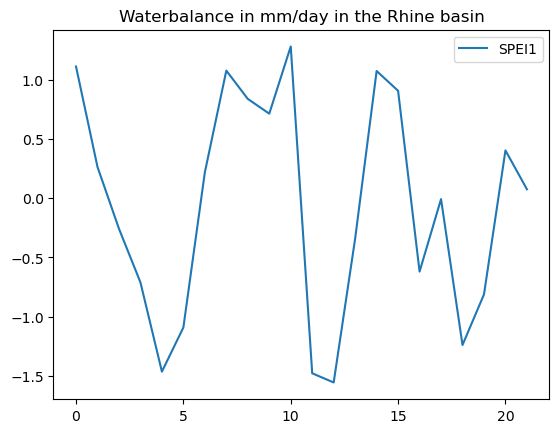

In [65]:
plt.plot(r_spei_values[0:22], label='SPEI1')
#plt.plot((TSpr*60*60*24) - TSpet, label='wb: pr-pet')
plt.legend()
plt.title('Waterbalance in mm/day in the Rhine basin')

Text(0.5, 1.0, 'Waterbalance in mm/day in the Rhine basin')

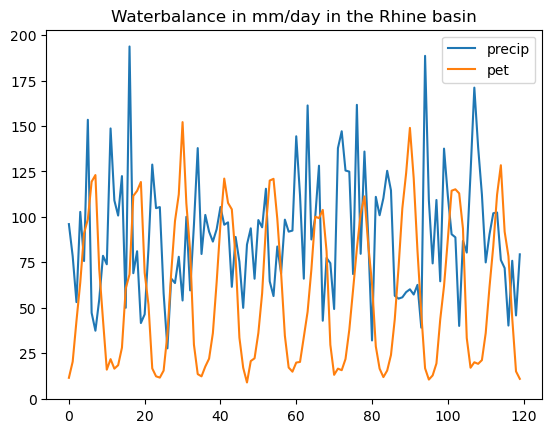

In [58]:
plt.plot((TSpr*60*60*24*30), label='precip')
plt.plot(TSpet*30, label='pet')
plt.legend()
plt.title('Waterbalance in mm/day in the Rhine basin')

In [56]:
r_spei_values.shape

(73,)

In [66]:
[func.spei_ref[:]]

[[1961, 2020]]

In [63]:
[func.spei_ref[1]]

[2020]

59

In [32]:
ds.time.dt.year[0].values

array(2000)

In [33]:
ds.time.dt.month[0].values

array(1)

#### Have a bunch of necessary definitions

In [3]:
def open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None):
    """
    Open one LENTIS data file from the ensemle
    """
    if timeslice == 'PD': 
        letter = 'h'
    elif timeslice == '2K': 
        letter = 's'
        
    ens_member=f'{letter}{str(i).zfill(2)}{str(j)}'
    
    file=f"{diri}/{timeslice}/{freq}/{var}/{var}_{ens_member}.nc"
    
    if plev != None:
        ds=xr.open_dataset(file).sel(plev=plev)
    else:
        ds=xr.open_dataset(file)
    
    return ds, ens_member

In [4]:
def calc_boxstat(ds, var, area='global'): 
    """
    Compute spatial weighted mean
    ds      :  xarray DataArray
    """ 
    box_seasons = ds.time.dt.season

    if hasattr(ds, 'lat'):
            weights = np.cos(ds.lat * np.pi / 180)
    elif hasattr(ds, 'latitude'):
            weights = np.cos(ds.latitude * np.pi / 180)

    if area=='global':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].weighted(weights).mean(dim=('latitude','longitude')) 
    elif area=='nh':
        if hasattr(ds, 'lat'): 
            boxstat = ds[var].sel(lat=slice(0,90)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(0,90)).weighted(weights).mean(dim=('latitude','longitude')) 
    elif area=='europe':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(30,70),lon=slice(-10,40)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(30,70),longitude=slice(-10,40)).weighted(weights).mean(dim=('latitude','longitude'))  

    # regions for Pieter Slomp
    elif area in ['rhine',]:
        path_mask = '/perm/nklm/Px_drought/' + area + '.nc'
        basin_mask = xr.open_dataset(path_mask).catchmentID[0,:,:]

        if hasattr(ds, 'lat'):
            boxstat = ds[var].where(basin_mask).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].where(basin_mask).weighted(weights).mean(dim=('latitude','longitude'))   
            
    # regions for Leonie Hemelrijk
    elif area=='LH_westEU':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(30,60),lon=slice(-30,30)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(30,60),longitude=slice(-30,30)).weighted(weights).mean(dim=('latitude','longitude'))    
    elif area=='LH_rhine':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(47,55),lon=slice(2,10)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(47,55),longitude=slice(2,10)).weighted(weights).mean(dim=('latitude','longitude'))

    else:
        raise ValueError('unknown area: '+area)
            
            
    return boxstat, box_seasons

In [5]:
def get_attr_info(var, freq, timeslice, diri):
    """
    
    """
    ds, ens_member = open_one_LENTIS(var, freq, timeslice, 1, 1, diri)
    
    # get global attributes
    attrs=ds.attrs
    
    # get coordinates
    time_attrs=ds.time.attrs
    lat_attrs=ds.lat.attrs
    lon_attrs=ds.lon.attrs

    # get coordinate bounds 
    time_bnds=ds.time_bnds
    lat_bnds=ds.lat_bnds
    lon_bnds=ds.lon_bnds
    
    # get part of the var attributes
    var_units=ds[var].units
    var_standard_name=ds[var].standard_name
    var_long_name=ds[var].long_name
    
    
    return attrs, time_attrs, time_bnds, var_units, var_standard_name, var_long_name

In [6]:
def calc_ens_statistics_and_to_netcdf(var, freq, timeslice, plev, diri, diro, area='global', seas='ANN', statistic='mean'):
    '''
    """Compute the annual-averaged, global weighted mean 
    for a given variable, for all ensemble members of a time slice"""
    '''
    
    # define variables of the computed quantity and its ensemble member
    ens_stat_values=[]
    ens_member_list=[]
    
    # Do the calculation
    for i in np.arange(1,16+1):
        for j in np.arange(0,9+1):
            ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev)
            #ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri)
            boxstat,box_seasons = calc_boxstat(ds, var, area)
            seasonal_avg = calc_seasonal_avg(boxstat,box_seasons, seas)

            ens_stat_values.append(seasonal_avg)
            ens_member_list.append(ens_member)
            del ds,boxstat,seasonal_avg,ens_member

    
    # Prepare xarray.dataset to save as Netcdf file
    attrs, time_attrs, time_bnds, var_units, var_standard_name, var_long_name = get_attr_info(var,freq,timeslice, diri)
    
    # time_attrs = {'standard_name': 'time',
    #                 'long_name': 'time',
    #                 'bounds': 'time_bnds',
    #                 'axis': 'T'}
    
    time_bnds_combined, time_avg = get_avg_timebnds(var, freq, timeslice, diri, seas)
    
    ens_attrs = {'standard_name': 'ens_mem',
                 'long_name': 'Ensemble member',
                 'comment': 'Postprocessed by Laura Muntjewerf (KNMI). A time slice of KNMI-LENTIS consists of 16 ensemble member of 10 years. All simulations have a unique ensemble member label that reflects the forcing, and how the initial conditions are generated. The initial conditions have two aspects: the parent simulation from which the run is branched (macro perturbation, there are 16), and the seed relating to a particular micro-perturbation in the initial three-dimensional atmosphere temperature field (there are 10). The ensemble member label thus is a combination of: forcing (h for present-dsy/historical and s for +2K/SSP2-4.5), parent ID (number between 1 and 16), micro perturbation ID (number between 0 and 9) '}
    coords={'time': (['time'], time_avg.data, time_attrs),
            'ens': (['ens'], ens_member_list, ens_attrs)
            }
    
    var_attr = {'units': var_units, 
                        'standard_name': f'{var_standard_name}_{area}_{seas}_{statistic}',
                        'long_name': f'{statistic} {var_long_name} of {area} ({seas})'}
                    
    
    # define data with variable attributes as Xarray dataset
    ds_new = xr.Dataset(
    data_vars=dict(
        time_bnds=(["time", "bnds"], 
                     time_bnds_combined,{}),
        ens_bnds=(["ens"], 
                     ens_member_list,{}),
        var=(['ens','time'],  
                      ens_stat_values, 
                       var_attr,
    )),
    coords=coords,
    attrs=attrs,
    )
    
    # assign encoding
    # otherwise it will throw error when opening with nvciew --> (ncview: netcdf_dim_value: unknown data type (10) for dimension time) en (unknown data type (12) for dimension ens)
    ds_new.ens.encoding = {'zlib': False,
                     'shuffle': False,
                     'complevel': 0,
                     'fletcher32': False,
                     'contiguous': False,
                     'chunksizes': None,
                     'dtype': '|S1'}

    ds_new.time.encoding = {'zlib': False,
                        'shuffle': False,
                        'complevel': 0,
                        'fletcher32': False,
                        'contiguous': False,
                        'dtype': np.dtype('float64'),
                        'units': 'days since 1850-01-01 00:00:00',
                        'calendar': 'proleptic_gregorian'
                        }

    

    # create dataset
    # Save in right location
    
    if plev != None:
        filo=f'{timeslice}_ensemble_{area}_{seas}_{freq}_{var}_{plev}_mean.nc'
    else:
        filo=f'{timeslice}_ensemble_{area}_{seas}_{freq}_{var}_mean.nc'
    

    ds_new.to_netcdf(f'{diro}/{filo}', unlimited_dims='ens')
    